# Advertisement Project

### Introduction

For this project, we are pretending that we work for an e-learning company that offers courses on programming. Something along the lines of Coursera, for example. Our company would like to invest money into the advertisement space to generate interest in our products. The goal of this project is to find the two best markets to advertise within in order to generate the best return on our investment.

Now, obviously because this is a hypothetical scenario, we do not have access to our imaginary dataset. As a result, we will be using a dataset compiled by the popular e-learning platform freeCodeCamp. The data is from 2017 and is what we shall be analyzing today.

### Data Exploration

As always, we begin by importing the necessary packages, loading in our data frame, and inspecting the results to see what we are working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
file = '2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(file)
survey.head(7)  # Examine the first 7 rows of our data frame

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that there are 136 columns. That is a lot. So much in fact, that our data frame cannot even display them all. Let's print them all out to see which columns will be relevant for our analysis. 

In [2]:
for column in survey.columns:
    print(column)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


### Data Preprocessing

There is no way that we are going to use all 136 columns in this data set. However, recall that our original goal is to find 2 markets that are excellent to advertise in. In order to get to that goal, we want to answer questions about a population of new coders that are interested in the subjects that we teach.

A good place to start would be to figure out:
- Where these new coders are located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend

Because we are dealing with a population, we want to make sure that this dataset is representative. This will ensure that the conclusions that we draw will be valid.

In [3]:
# We begin by generating a frequency table for the JobRoleInterest column.
job_interest_table = survey['JobRoleInterest'].value_counts(normalize=True) * 100  # Generates freq table
print(job_interest_table)

Full-Stack Web Developer                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                                     1.673341
Game Developer                          

Notice that within our table, people can select more than a single field of interest. Let's try splitting our data to see how many people are interested in a single subject and how many people are interested in multiple. 

In [4]:
job_interest_nonull = survey['JobRoleInterest'].dropna() # We remove NaN
areas_of_interest = job_interest_nonull.str.split(',')  # Split jobs on commas

# We then return the number of jobs based upon the split list from above
interest_split = areas_of_interest.apply(lambda x: len(x)) 
split_table = interest_split.value_counts(normalize=True).sort_index() * 100
print(split_table)

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


We now can see that only about 31% of users are interested in a single field. However, over half are interested in 3, and about 83% are interested in 5 fields. This begs the question: "Is there a field where the majority of learners have an interest in?"

Web and mobile development appears to be a fairly popular field on free code camp. Let's split our data again, only this time let's see how many peole listed web development at least once in their interests.

In [5]:
# We will generate a freq table to see how many learners list web/mobile development
web_mobile_development = job_interest_nonull.str.contains('Web Developer|Mobile Developer')
freq_table = web_mobile_development.value_counts(normalize=True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


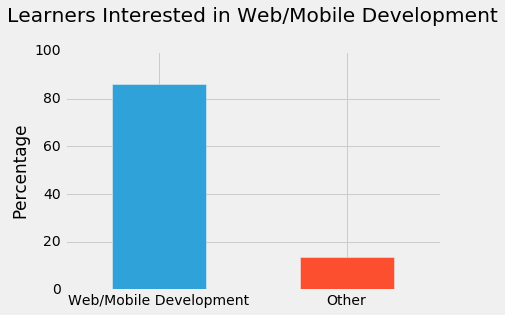

In [6]:
# We now generate a graph to better represent our findings
%matplotlib inline
style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title("Learners Interested in Web/Mobile Development", y=1.1)
plt.ylabel("Percentage")
plt.xticks([0,1], ['Web/Mobile Development', 'Other'], rotation=0)
plt.ylim([0,100])
plt.show()

We conclude that the vast majority of users on free code camp (86%) are interested in web or mobile development. As a result, we should tailor our advertisements towards courses that our company offers on these fields. Additionally, this will provide plenty of information for additional analysis.

### Data Analysis

Perhaps the most important area to consider when contemplating a new advertising campaign is location. As a result, we will want to examine where the different locations the learners in the data set above are reporting form. 

This will allow us to target the two most popular countries for our advertisement goal. The following section will be dedicated to generating this insight. 

In [7]:
# We will use our non-null data frame created in the section above
survey['JobRoleInterest'] = survey['JobRoleInterest'].dropna(axis=0)  # Drop NaN rows
country_table_relative = survey['CountryLive'].value_counts(normalize=True) * 100
print(country_table_relative)

United States of America         37.760824
India                             9.128847
United Kingdom                    4.936098
Canada                            4.016693
Brazil                            2.373500
Germany                           2.112676
Poland                            1.727960
Russia                            1.714919
Australia                         1.688837
France                            1.486698
Spain                             1.414971
Nigeria                           1.395409
Ukraine                           1.317162
Romania                           1.115023
Italy                             1.069379
Mexico                            1.010694
Netherlands (Holland, Europe)     0.925926
Philippines                       0.880282
South Africa                      0.821596
Turkey                            0.782473
Greece                            0.756390
Serbia                            0.749870
Argentina                         0.736828
Pakistan   

In [8]:
country_table_absolute = survey['CountryLive'].value_counts()
print(country_table_absolute)

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia                          91
China       

Based upon the absolute and relative frequency charts, we can argue that it is safe to conclude that the United States and India should be the markets we are willing to advertise in. 

However, perhaps the even more important question is, "How much money are we willing to spend in each market?". The following section will deal with this valid question.

In [9]:
# We will use the MoneyForLearning column to determine how much 
# learners are willing to spend.
survey['MonthsProgramming'].replace(0, 1, inplace=True)  # Prevent 0 divisors

# We now create a new column that will act as a proxy for how much learners are
# willing to spend on a subscription. 
survey['WillingToSpend'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
survey['WillingToSpend'].isnull().sum()  # Check to see # of null values

1995

In [10]:
# Reomve NaN rows form our data frame
survey['WillingToSpend'] = survey['WillingToSpend'].dropna(axis=0)  # Drop NaN rows
survey['CountryLive'] = survey['CountryLive'].dropna(axis=0)  # Drop NaN rows

In [11]:
# Create a groupby where we take the mean of the number of countries.
countries_mean = survey.groupby('CountryLive').mean()
countries_mean['WillingToSpend'][['United States of America', 'Canada', 'India', 'United Kingdom']]

CountryLive
United States of America    206.297711
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
Name: WillingToSpend, dtype: float64

## Conclusion

We conclude form this project that the countries we should be willing to advertise in are the United States and India from a response point of view.

However, if we were interested in generating as much money as possible, we might consider advertising in Canada as opposed to India due to the fact that Canadians are more willing to pay for services than those who reside in India. 